In [43]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
#print(data_breast_cancer['DESCR'])

In [44]:
from sklearn.tree import DecisionTreeClassifier
X_cancer = data_breast_cancer['data'][['mean texture', 'mean symmetry']]
y_cancer = data_breast_cancer['target']

from sklearn.model_selection import train_test_split
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=21)

from sklearn.metrics import f1_score
'''for i in range(20):
    tree_clf = DecisionTreeClassifier(max_depth=i+1)
    tree_clf.fit(X_cancer_train, y_cancer_train)
    #print(data_breast_cancer.feature_names)
    print(tree_clf.max_depth)
    print(f1_score(y_cancer_test, tree_clf.predict(X_cancer_test)))
    print(f1_score(y_cancer_train, tree_clf.predict(X_cancer_train)))'''
#best max_depth = 4
    
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_cancer_train, y_cancer_train)

DecisionTreeClassifier(max_depth=4)

In [45]:
from sklearn.tree import export_graphviz
f = "bc"
export_graphviz(
        tree_clf,
        out_file=f,
        feature_names=data_breast_cancer.feature_names[[1, 8]],
        class_names=[str(num)+", "+name
                     for num,name in
                     zip(set(data_breast_cancer.target),data_breast_cancer.target_names)],
        rounded=True,
        filled=True) 


In [46]:
import graphviz
print(graphviz.render('dot', 'png', f))
print(tree_clf.max_depth)

bc.png
4


In [47]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#zbior uczacy f1 score
f1_score_train = f1_score(y_cancer_train, tree_clf.predict(X_cancer_train))

#zbior testujacy f1 score
f1_score_test = f1_score(y_cancer_test, tree_clf.predict(X_cancer_test))

print(f1_score_train, f1_score_test)

#zbiór uczący accuracy
y_train_pred = tree_clf.predict(X_cancer_train)
acc_train = accuracy_score(y_cancer_train, y_train_pred)

#zbiór testujący accuracy
y_test_pred = tree_clf.predict(X_cancer_test)
acc_test = accuracy_score(y_cancer_test, y_test_pred)

print(acc_train, acc_test)

cancer_res_list = [tree_clf.max_depth, f1_score_train, f1_score_test, acc_train, acc_test]
print(cancer_res_list)

0.8419301164725458 0.8421052631578949
0.7912087912087912 0.7894736842105263
[4, 0.8419301164725458, 0.8421052631578949, 0.7912087912087912, 0.7894736842105263]


In [48]:
import pickle
with open('f1acc_tree.pkl', 'wb') as fp:
    pickle.dump(cancer_res_list, fp)

<AxesSubplot:xlabel='x', ylabel='y'>

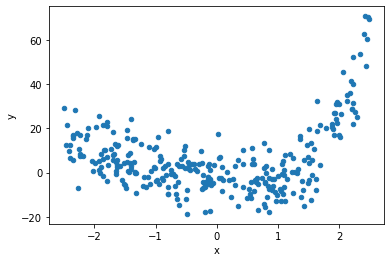

In [49]:
import numpy as np
import pandas as pd

size = 300

np.random.seed(54)
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [50]:
from sklearn.model_selection import train_test_split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

#for i in range(20):
    #tree_reg = DecisionTreeRegressor(max_depth=i+1)
    #tree_reg.fit(X_reg_train.reshape(-1, 1), y_reg_train)
    #print(tree_reg)
    #print(mean_squared_error(y_reg_test, tree_reg.predict(X_reg_test.reshape(-1, 1))))
    #print(mean_squared_error(y_reg_train, tree_reg.predict(X_reg_train.reshape(-1, 1))))
#best max_depth=3

In [52]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_reg_train.reshape(-1, 1), y_reg_train)
tree_reg.predict([[1]])

array([-1.85059029])

In [53]:
mse_test = mean_squared_error(y_reg_test, tree_reg.predict(X_reg_test.reshape(-1, 1)))
mse_train = mean_squared_error(y_reg_train, tree_reg.predict(X_reg_train.reshape(-1, 1)))
tree_res_list = [tree_reg.max_depth, mse_train, mse_test]
print(tree_res_list)

[3, 62.15310237780263, 47.41729899746062]


In [54]:
from sklearn.tree import export_graphviz
f = "reg"
export_graphviz(
        tree_reg,
        out_file=f,
        
        rounded=True,
        filled=True) 


In [55]:
import graphviz
print(graphviz.render('dot', 'png', f))

reg.png


In [56]:
import pickle
with open('mse_tree.pkl ', 'wb') as fp:
    pickle.dump(tree_res_list, fp)